In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

# URL for the CoinMarketCap API endpoint to get the latest cryptocurrency listings
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'

# Parameters to be sent with the API request
parameters = {
  'start':'1', # Starting at the first cryptocurrency
  'limit':'15', # Limiting the results to the top 15 cryptocurrencies
  'convert':'USD' # Converting the prices to USD
}

# Headers for the API request, including the API key for authentication
headers = {
  'Accepts': 'application/json', # Specifying that we expect a JSON response
  'X-CMC_PRO_API_KEY': '!!!COPY YOUR OWN KEY HERE!!!', # API key for CoinMarketCap
}

# Creating a session to persist parameters and headers
session = Session()
session.headers.update(headers) # Updating the session headers with our headers

try:
    # Making a GET request to the API endpoint with the specified parameters
    response = session.get(url, params=parameters)
    # Parsing the JSON response text into a Python dictionary
    data = json.loads(response.text)
    # Printing the parsed data
    #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
    # Catching and printing any connection errors, timeouts, or too many redirects
    print(e)

In [3]:
import pandas as pd

# Setting the pandas option to display all columns in the DataFrame without truncation
pd.set_option('display.max.column', None)

# Setting the pandas option to display all rows in the DataFrame without truncation
pd.set_option('display.max_rows', None)

In [5]:
# Normalizing the JSON data into a flat table and creating a DataFrame
df = pd.json_normalize(data['data'])

# Adding a new column 'timestamp' with the current date and time
df['timestamp'] = pd.to_datetime('now')

# Displaying the DataFrame
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11597,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.972030e+07,1.972030e+07,False,NaN,1,NaN,NaN,None,2024-07-14T15:46:00.000Z,59978.398481,2.170260e+10,18.5944,0.282655,1.995177,5.577776,-9.969644,-7.284822,-6.881481,1.182792e+12,53.6715,1.259546e+12,None,2024-07-14T15:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-14 17:47:29.911449
1,1027,Ethereum,ETH,ethereum,9132,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202157e+08,1.202157e+08,True,NaN,2,NaN,NaN,None,2024-07-14T15:45:00.000Z,3185.371637,1.006097e+10,5.1119,0.002949,0.923301,7.118371,-8.258052,6.960179,1.380821,3.829318e+11,17.3763,3.829318e+11,None,2024-07-14T15:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-14 17:47:29.911449
2,825,Tether USDt,USDT,tether,91523,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.124669e+11,1.160722e+11,True,NaN,3,NaN,NaN,None,2024-07-14T15:45:00.000Z,1.000265,4.072521e+10,14.3983,-0.003130,0.011666,0.012511,0.079390,0.004553,-0.027059,1.124967e+11,5.1065,1.161029e+11,None,2024-07-14T15:45:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-07-14 17:47:29.911449
3,1839,BNB,BNB,bnb,2192,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475823e+08,1.475823e+08,False,NaN,4,NaN,NaN,None,2024-07-14T15:45:00.000Z,534.463039,1.472682e+09,2.4946,0.176320,0.265739,7.000009,-11.488410,-7.817040,-5.108243,7.887727e+10,3.5786,7.887727e+10,None,2024-07-14T15:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-14 17:47:29.911449
4,5426,Solana,SOL,solana,701,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.640616e+08,5.801419e+08,True,NaN,5,NaN,NaN,None,2024-07-14T15:45:00.000Z,145.254642,1.951162e+09,70.9847,0.743822,3.400333,5.774349,0.505150,-4.604829,2.131262,6.740710e+10,3.0582,8.426831e+10,None,2024-07-14T15:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-14 17:47:29.911449
5,3408,USDC,USDC,usd-coin,20948,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.396699e+10,3.396699e+10,False,NaN,6,NaN,NaN,None,2024-07-14T15:45:00.000Z,0.999951,4.055730e+09,12.6988,-0.002940,-0.008731,-0.039855,-0.000787,-0.014003,-0.005818,3.396532e+10,1.5410,3.396532e+10,None,2024-07-14T15:45:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-07-14 17:47:29.911449
6,52,XRP,XRP,xrp,1352,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.580534e+10,9.998745e+10,False,NaN,7,NaN,NaN,None,2024-07-14T15:46:00.000Z,0.526836,2.382899e+09,16.8929,-0.946178,-2.103430,22.945516,11.006158,3.042401,6.493410,2.940028e+10,1.3345,5.268363e+10,None,2024-07-14T15:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-14 17:47:29.911449
7,11419,Toncoin,TON,toncoin,458,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.506928e+09,5.108978e+09,True,NaN,8,3.414167e+09,2.495491e+10,None,2024-07-14T15:45:00.000Z,7.309223,1.710303e+08,2.8997,0.042796,-0.291011,-0.184187,-8.098624,5.150637,7.615265,1.832370e+10,0.8313,3.734266e+10,None,2024-07-14T15:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-14 17:47:29.911449
8,74,Dogecoin,DOGE,dogecoin,1021,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.45113

In [7]:
df = pd.DataFrame()

def api_runner():
    global df
    
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '!!!COPY YOUR OWN KEY HERE!!!',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')

    df = pd.concat([df, df2], ignore_index=True)

    # Use this if you want to create a csv and append data to it
    #df = pd.json_normalize(data['data'])
    #df['timestamp'] = pd.to_datetime('now')
    #df

    #if not os.path.isfile(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv'):
        #df.to_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv', header='column_names')
    #else:
        #df.to_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv', mode='a', header=False)
        
    #Then to read in the file: df = pd.read_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv')

In [9]:
import os
from time import time, sleep

for i in range(333):
    api_runner() # Calling the function that executes the API call
    print('API Runner completed')
    sleep(60) # Pausing for 60 seconds between each API call
exit()

API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [11]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11597,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.972030e+07,1.972030e+07,False,NaN,1,NaN,NaN,None,2024-07-14T15:46:00.000Z,59978.398481,2.170260e+10,18.5944,0.282655,1.995177,5.577776,-9.969644,-7.284822,-6.881481,1.182792e+12,53.6715,1.259546e+12,None,2024-07-14T15:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-14 17:47:48.822200
1,1027,Ethereum,ETH,ethereum,9132,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202157e+08,1.202157e+08,True,NaN,2,NaN,NaN,None,2024-07-14T15:45:00.000Z,3185.371637,1.006097e+10,5.1119,0.002949,0.923301,7.118371,-8.258052,6.960179,1.380821,3.829318e+11,17.3763,3.829318e+11,None,2024-07-14T15:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-14 17:47:48.822200
2,825,Tether USDt,USDT,tether,91523,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.124669e+11,1.160722e+11,True,NaN,3,NaN,NaN,None,2024-07-14T15:45:00.000Z,1.000265,4.072521e+10,14.3983,-0.003130,0.011666,0.012511,0.079390,0.004553,-0.027059,1.124967e+11,5.1065,1.161029e+11,None,2024-07-14T15:45:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-07-14 17:47:48.822200
3,1839,BNB,BNB,bnb,2192,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475823e+08,1.475823e+08,False,NaN,4,NaN,NaN,None,2024-07-14T15:45:00.000Z,534.463039,1.472682e+09,2.4946,0.176320,0.265739,7.000009,-11.488410,-7.817040,-5.108243,7.887727e+10,3.5786,7.887727e+10,None,2024-07-14T15:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-14 17:47:48.822200
4,5426,Solana,SOL,solana,701,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.640616e+08,5.801419e+08,True,NaN,5,NaN,NaN,None,2024-07-14T15:45:00.000Z,145.254642,1.951162e+09,70.9847,0.743822,3.400333,5.774349,0.505150,-4.604829,2.131262,6.740710e+10,3.0582,8.426831e+10,None,2024-07-14T15:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-14 17:47:48.822200
5,3408,USDC,USDC,usd-coin,20948,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.396699e+10,3.396699e+10,False,NaN,6,NaN,NaN,None,2024-07-14T15:45:00.000Z,0.999951,4.055730e+09,12.6988,-0.002940,-0.008731,-0.039855,-0.000787,-0.014003,-0.005818,3.396532e+10,1.5410,3.396532e+10,None,2024-07-14T15:45:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-07-14 17:47:48.822200
6,52,XRP,XRP,xrp,1352,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.580534e+10,9.998745e+10,False,NaN,7,NaN,NaN,None,2024-07-14T15:46:00.000Z,0.526836,2.382899e+09,16.8929,-0.946178,-2.103430,22.945516,11.006158,3.042401,6.493410,2.940028e+10,1.3345,5.268363e+10,None,2024-07-14T15:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-14 17:47:48.822200
7,11419,Toncoin,TON,toncoin,458,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.506928e+09,5.108978e+09,True,NaN,8,3.414167e+09,2.495491e+10,None,2024-07-14T15:45:00.000Z,7.309223,1.710303e+08,2.8997,0.042796,-0.291011,-0.184187,-8.098624,5.150637,7.615265,1.832370e+10,0.8313,3.734266e+10,None,2024-07-14T15:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-14 17:47:48.822200
8,74,Dogecoin,DOGE,dogecoin,1021,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.45113

In [13]:
# Setting the pandas option to format floating-point numbers to 5 decimal places in the DataFrame
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [15]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11597,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19720296.00000,19720296.00000,False,NaN,1,NaN,NaN,None,2024-07-14T15:46:00.000Z,59978.39848,21702598319.32561,18.59440,0.28266,1.99518,5.57778,-9.96964,-7.28482,-6.88148,1182791771645.63403,53.67150,1259546368095.00000,None,2024-07-14T15:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-14 17:47:48.822200
1,1027,Ethereum,ETH,ethereum,9132,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120215726.06015,120215726.06015,True,NaN,2,NaN,NaN,None,2024-07-14T15:45:00.000Z,3185.37164,10060972520.01734,5.11190,0.00295,0.92330,7.11837,-8.25805,6.96018,1.38082,382931764129.99219,17.37630,382931764129.98999,None,2024-07-14T15:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-14 17:47:48.822200
2,825,Tether USDt,USDT,tether,91523,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,112466925458.78345,116072162582.33752,True,NaN,3,NaN,NaN,None,2024-07-14T15:45:00.000Z,1.00027,40725206725.84692,14.39830,-0.00313,0.01167,0.01251,0.07939,0.00455,-0.02706,112496733043.31088,5.10650,116102925678.10001,None,2024-07-14T15:45:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-07-14 17:47:48.822200
3,1839,BNB,BNB,bnb,2192,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,147582273.52798,147582273.52798,False,NaN,4,NaN,NaN,None,2024-07-14T15:45:00.000Z,534.46304,1472682160.88883,2.49460,0.17632,0.26574,7.00001,-11.48841,-7.81704,-5.10824,78877270369.30222,3.57860,78877270369.30000,None,2024-07-14T15:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-14 17:47:48.822200
4,5426,Solana,SOL,solana,701,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,464061620.28860,580141907.37870,True,NaN,5,NaN,NaN,None,2024-07-14T15:45:00.000Z,145.25464,1951161504.53882,70.98470,0.74382,3.40033,5.77435,0.50515,-4.60483,2.13126,67407104651.31221,3.05820,84268305228.45000,None,2024-07-14T15:45:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-14 17:47:48.822200
5,3408,USDC,USDC,usd-coin,20948,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,33966988858.87383,33966988858.87383,False,NaN,6,NaN,NaN,None,2024-07-14T15:45:00.000Z,0.99995,4055729667.34268,12.69880,-0.00294,-0.00873,-0.03986,-0.00079,-0.01400,-0.00582,33965321688.15269,1.54100,33965321688.15000,None,2024-07-14T15:45:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-07-14 17:47:48.822200
6,52,XRP,XRP,xrp,1352,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,55805339473.00000,99987452475.00000,False,NaN,7,NaN,NaN,None,2024-07-14T15:46:00.000Z,0.52684,2382899440.99341,16.89290,-0.94618,-2.10343,22.94552,11.00616,3.04240,6.49341,29400278130.91889,1.33450,52683629216.42000,None,2024-07-14T15:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-14 17:47:48.822200
7,11419,Toncoin,TON,toncoin,458,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2506927980.34397,5108978246.84001,True,NaN,8,3414166606.00000,24954905932.71566,None,2024-07-14T15:45:00.000Z,7.30922,171030289.89024,2.89970,0.04280,-0.29101,-0.18419,-8.09862,5.15064,7.61527,18323696277.63166,0.83130,37342662580.71000,None,2024-07-14T15:45:00.000Z

In [17]:
# Grouping the DataFrame by the 'name' column without sorting, and calculating the mean of specific columns
df3 = df.groupby('name', sort = False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()

df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.28266,1.99518,5.57778,-9.96964,-7.28482,-6.88148
Ethereum,0.00295,0.92330,7.11837,-8.25805,6.96018,1.38082
Tether USDt,-0.00313,0.01167,0.01251,0.07939,0.00455,-0.02706
BNB,0.17632,0.26574,7.00001,-11.48841,-7.81704,-5.10824
Solana,0.74382,3.40033,5.77435,0.50515,-4.60483,2.13126
USDC,-0.00294,-0.00873,-0.03986,-0.00079,-0.01400,-0.00582
XRP,-0.94618,-2.10343,22.94552,11.00616,3.04240,6.49341
Toncoin,0.04280,-0.29101,-0.18419,-8.09862,5.15064,7.61527
Dogecoin,0.48839,1.13237,4.91720,-19.62880,-26.10120,-26.88430


In [19]:
# Stacking the DataFrame to convert the columns into a multi-level index
df4 = df3.stack()

df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.28266
             quote.USD.percent_change_24h     1.99518
             quote.USD.percent_change_7d      5.57778
             quote.USD.percent_change_30d    -9.96964
             quote.USD.percent_change_60d    -7.28482
             quote.USD.percent_change_90d    -6.88148
Ethereum     quote.USD.percent_change_1h      0.00295
             quote.USD.percent_change_24h     0.92330
             quote.USD.percent_change_7d      7.11837
             quote.USD.percent_change_30d    -8.25805
             quote.USD.percent_change_60d     6.96018
             quote.USD.percent_change_90d     1.38082
Tether USDt  quote.USD.percent_change_1h     -0.00313
             quote.USD.percent_change_24h     0.01167
             quote.USD.percent_change_7d      0.01251
             quote.USD.percent_change_30d     0.07939
             quote.USD.percent_change_60d     0.00455
             quote.USD.percent_change_90

In [21]:
type(df4)

pandas.core.series.Series

In [23]:
# Converting the Series 'df4' to a DataFrame with the column name 'values'
df5 = df4.to_frame(name = 'values')

df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.28266
            quote.USD.percent_change_24h   1.99518
            quote.USD.percent_change_7d    5.57778
            quote.USD.percent_change_30d  -9.96964
            quote.USD.percent_change_60d  -7.28482
            quote.USD.percent_change_90d  -6.88148
Ethereum    quote.USD.percent_change_1h    0.00295
            quote.USD.percent_change_24h   0.92330
            quote.USD.percent_change_7d    7.11837
            quote.USD.percent_change_30d  -8.25805
            quote.USD.percent_change_60d   6.96018
            quote.USD.percent_change_90d   1.38082
Tether USDt quote.USD.percent_change_1h   -0.00313
            quote.USD.percent_change_24h   0.01167
            quote.USD.percent_change_7d    0.01251
            quote.USD.percent_change_30d   0.07939
            quote.USD.percent_change_60d   0.00455
            quote.USD.percent_change_90d  -0.02706
BNB         quote.USD.percent_change_1h    0.17632
            quote.USD.percent_change_24h   0.26574
            quote.USD.percent_change_7d    7.00001
            quote.USD.percent_change_30d -11.48841
            quote.USD.percent_change_60d  -7.81704
            quote.USD.percent_change_90d  -5.10824
Solana      quote.USD.percent_change_1h    0.74382
            quote.USD.percent_change_24h   3.40033
            quote.USD.percent_change_7d    5.77435
            quote.USD.percent_change_30d   0.50515
            quote.USD.percent_change_60d  -4.60483
            quote.USD.percent_change_90d   2.13126
USDC        quote.USD.percent_change_1h   -0.00294
            quote.USD.percent_change_24h  -0.00873
            quote.USD.percent_change_7d   -0.03986
            quote.USD.percent_change_30d  -0.00079
            quote.USD.percent_change_60d  -0.01400
            quote.USD.percent_change_90d  -0.00582
XRP         quote.USD.percent_change_1h   -0.94618
            quote.USD.percent_change_24h  -2.10343
            quote.USD.percent_change_7d   22.94552
            quote.USD.percent_change_30d  11.00616
            quote.USD.percent_change_60d   3.04240
            quote.USD.percent_change_90d   6.49341
Toncoin     quote.USD.percent_change_1h    0.04280
            quote.USD.percent_change_24h  -0.29101
            quote.USD.percent_change_7d   -0.18419
            quote.USD.percent_change_30d  -8.09862
            quote.USD.percent_change_60d   5.15064
            quote.USD.percent_change_90d   7.61527
Dogecoin    quote.USD.percent_change_1h    0.48839
            quote.USD.percent_change_24h   1.13237
            quote.USD.percent_change_7d    4.91720
            quote.USD.percent_change_30d -19.62880
            quote.USD.percent_change_60d -26.10120
            quote.USD.percent_change_90d -26.88430
Cardano     quote.USD.percent_change_1h    0.02522
            quote.USD.percent_change_24h  -0.70796
            quote.USD.percent_change_7d   20.19396
            quote.USD.percent_change_30d   3.27951
            quote.USD.percent_change_60d  -3.73856
            quote.USD.percent_change_90d  -7.85281
TRON        quote.USD.percent_change_1h   -0.35673
            quote.USD.percent_change_24h  -1.79600
            quote.USD.percent_change_7d    7.86294
            quote.USD.percent_change_30d  18.05670
            quote.USD.percent_change_60d   9.10309
            quote.USD.percent_change_90d  22.49501
Avalanche   quote.USD.percent_change_1h    0.18850
            quote.USD.percent_change_24h  -0.97237
            quote.USD.percent_change_7d   -0.32478
            quote.USD.percent_change_30d -16.44846
            quote.USD.percent_change_60d -24.27473
            quote.USD.percent_change_90d -29.50651
Shiba Inu   quote.USD.percent_change_1h    0.56954
            quote.USD.percent_change_24h  -0.02549
            quote.USD.percent_change_7d    8.44922
            quote.USD.percent_change_30d -18.35241
            quote.USD.percent_change_60d -27.68006
            quo

In [25]:
df5.count()

values    90
dtype: int64

In [27]:
# Creating a new index with a range of 90 and setting it to 'df5'
index = pd.Index(range(90))

# Setting the new index to 'df5'
df6 = df5.set_index(index)

# Resetting the index of 'df6' to default integer index and converting the old index to columns
df6 = df5.reset_index()

df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.28266
1,Bitcoin,quote.USD.percent_change_24h,1.99518
2,Bitcoin,quote.USD.percent_change_7d,5.57778
3,Bitcoin,quote.USD.percent_change_30d,-9.96964
4,Bitcoin,quote.USD.percent_change_60d,-7.28482
5,Bitcoin,quote.USD.percent_change_90d,-6.88148
6,Ethereum,quote.USD.percent_change_1h,0.00295
7,Ethereum,quote.USD.percent_change_24h,0.92330
8,Ethereum,quote.USD.percent_change_7d,7.11837
9,Ethereum,quote.USD.percent_change_30d,-8.25805


In [29]:
# Renaming the column 'level_1' to 'percent_change' in DataFrame df6
df7 = df6.rename(columns = {'level_1': 'percent_change'})

df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.28266
1,Bitcoin,quote.USD.percent_change_24h,1.99518
2,Bitcoin,quote.USD.percent_change_7d,5.57778
3,Bitcoin,quote.USD.percent_change_30d,-9.96964
4,Bitcoin,quote.USD.percent_change_60d,-7.28482
5,Bitcoin,quote.USD.percent_change_90d,-6.88148
6,Ethereum,quote.USD.percent_change_1h,0.00295
7,Ethereum,quote.USD.percent_change_24h,0.92330
8,Ethereum,quote.USD.percent_change_7d,7.11837
9,Ethereum,quote.USD.percent_change_30d,-8.25805


In [31]:
# Replacing long column names with shorter labels in the 'percent_change' column of DataFrame df7
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])

df7

,name,percent_change,values
0,Bitcoin,1h,0.28266
1,Bitcoin,24h,1.99518
2,Bitcoin,7d,5.57778
3,Bitcoin,30d,-9.96964
4,Bitcoin,60d,-7.28482
5,Bitcoin,90d,-6.88148
6,Ethereum,1h,0.00295
7,Ethereum,24h,0.92330
8,Ethereum,7d,7.11837
9,Ethereum,30d,-8.25805


In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

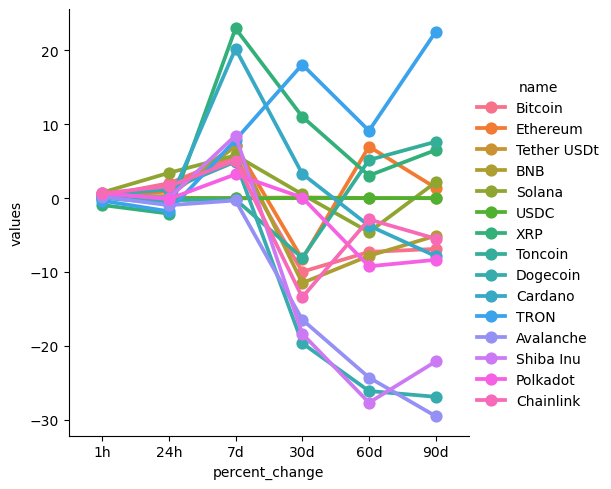

In [34]:
# Creating a categorical plot using seaborn (sns) with points
sns.catplot(x = 'percent_change', y = 'values', hue = 'name', data = df7, kind = 'point')

In [37]:
# Selecting specific columns 'name', 'quote.USD.price', and 'timestamp' from DataFrame df
df10 = df[['name', 'quote.USD.price', 'timestamp']]

# Querying the DataFrame to filter rows where the 'name' column equals 'Bitcoin'
df10 = df10.query("name == 'Bitcoin'")

df10

,name,quote.USD.price,timestamp
0,Bitcoin,59978.39848,2024-07-14 17:47:48.822200
15,Bitcoin,59978.39848,2024-07-14 17:47:54.043558
30,Bitcoin,59978.39848,2024-07-14 17:47:59.301243


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

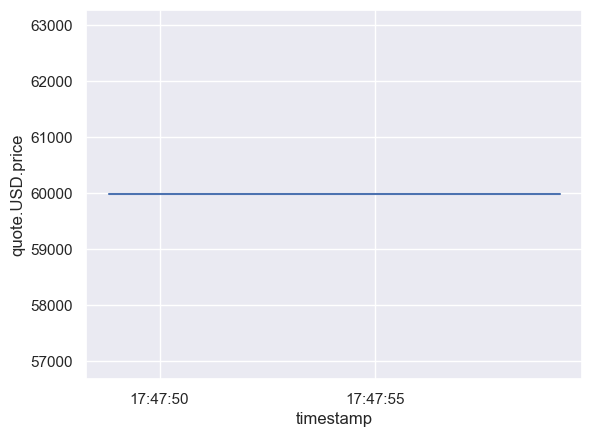

In [39]:
# Setting the seaborn theme to darkgrid
sns.set_theme(style = "darkgrid")

# Creating a line plot using seaborn (sns) with 'timestamp' on the x-axis and 'quote.USD.price' on the y-axis from df10
sns.lineplot(x = 'timestamp', y = 'quote.USD.price', data = df10)